# IAA Laboratori 9 - Laboratory Report

In [1]:
#%pip install ucimlrepo
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    balanced_accuracy_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from sklearn.model_selection import GridSearchCV

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.original 
y = cirrhosis_patient_survival_prediction.data.targets 

In [4]:
df = pd.DataFrame(X,  cirrhosis_patient_survival_prediction.original)

In [5]:
df.shape

(418, 20)

## INTERPRETACIÓ CORRECTA PER SOFTWARE

In [6]:
cirrhosis_patient_survival_prediction.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,unique identifier,None,no
1,N_Days,Other,Integer,None,number of days between registration and the ea...,None,no
2,Status,Target,Categorical,None,"status of the patient C (censored), CL (censor...",None,no
3,Drug,Feature,Categorical,None,type of drug D-penicillamine or placebo,None,yes
4,Age,Feature,Integer,Age,age,days,no
5,Sex,Feature,Categorical,Sex,M (male) or F (female),None,no
6,Ascites,Feature,Categorical,None,presence of ascites N (No) or Y (Yes),None,yes
7,Hepatomegaly,Feature,Categorical,None,presence of hepatomegaly N (No) or Y (Yes),None,yes
8,Spiders,Feature,Categorical,None,presence of spiders N (No) or Y (Yes),None,yes
9,Edema,Feature,Categorical,None,presence of edema N (no edema and no diuretic ...,None,no


In [7]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


Es pot eliminar la columna ID, que no aporta informacions útils en aquesta pràctica.

In [8]:
df.drop('ID', axis=1, inplace=True)

In [9]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


In [10]:
df["Stage"][312] = np.nan

Comencem a estudiar les variables de la base de dades.

In [11]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (418, 19)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           313 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        313 non-null    object 
 6   Hepatomegaly   313 non-null    object 
 7   Spiders        313 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    312 non-null    object 
 11  Albumin        418 non-null    float64
 12  Copper         312 non-null    object 
 13  Alk_Phos       312 non-null    float64
 1

Detectem que hi ha algunes variables categòriques amb moltes modalitats: són variables malinterpretades pel software (númeriques interpretades com categòriques). Les transformen als seus tipus correctes.

In [12]:
variables_mal_cod = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
for var in variables_mal_cod:
    df[var] = pd.to_numeric(df[var], errors='coerce').astype('Int64')

Per altra banda, la variable 'Stage' s'ha detectat com a númerica, que hauria de ser categòrica ordinal

In [13]:
df["Stage"].unique()

array([ 4.,  3.,  2.,  1., nan])

In [14]:
df["Stage"] = df["Stage"].astype('category')
novas_etiquetas = {4.0: '4', 3.0: '3', 2.0: '2', 1.0: '1'}
ordre_categories = ['1', '2', '3', '4']
df['Stage'] = df['Stage'].cat.rename_categories(novas_etiquetas)
df['Stage'] = df['Stage'].cat.reorder_categories(ordre_categories, ordered=True)

També observem que alguns missings values han siguts detectats com a una nova modalitat en les variables catgòriques. Els convertim a valors buits (NA). 

In [15]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O' or feature == "Stage")]
for var in cat_features:    
    print(df[var].value_counts(),'\n')

Status
C     232
D     161
CL     25
Name: count, dtype: int64 

Drug
D-penicillamine    158
Placebo            154
NaNN                 1
Name: count, dtype: int64 

Sex
F    374
M     44
Name: count, dtype: int64 

Ascites
N       288
Y        24
NaNN      1
Name: count, dtype: int64 

Hepatomegaly
Y       160
N       152
NaNN      1
Name: count, dtype: int64 

Spiders
N       222
Y        90
NaNN      1
Name: count, dtype: int64 

Edema
N    354
S     44
Y     20
Name: count, dtype: int64 

Stage
3    155
4    144
2     92
1     21
Name: count, dtype: int64 



In [16]:
variables_imp_na = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
for var in variables_imp_na:
    df[var][df[var] == 'NaNN'] = np.nan

## ANÀLISIS DE DADES ABANS DEL PREPROCESSAMENT

In [17]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (418, 19)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         418 non-null    int64   
 1   Status         418 non-null    object  
 2   Drug           312 non-null    object  
 3   Age            418 non-null    int64   
 4   Sex            418 non-null    object  
 5   Ascites        312 non-null    object  
 6   Hepatomegaly   312 non-null    object  
 7   Spiders        312 non-null    object  
 8   Edema          418 non-null    object  
 9   Bilirubin      418 non-null    float64 
 10  Cholesterol    284 non-null    Int64   
 11  Albumin        418 non-null    float64 
 12  Copper         310 non-null    Int64   
 13  Alk_Phos       312 non-nul

Ara estudiem les distribucions de les variables.

In [18]:
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  8
********************************************************************************
Categorical variables column name: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']


In [19]:
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' and feature != "Stage")]
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


## VARIABLES CATEGÒRIQUES: ESTUDI DE BALANCEIG

Es veu clarament que hi ha un desbalaceig de classe. Per a la construcció dels models farem servir weight_balanced, ja que les tècniques de Resampling tenen massa incovenients...

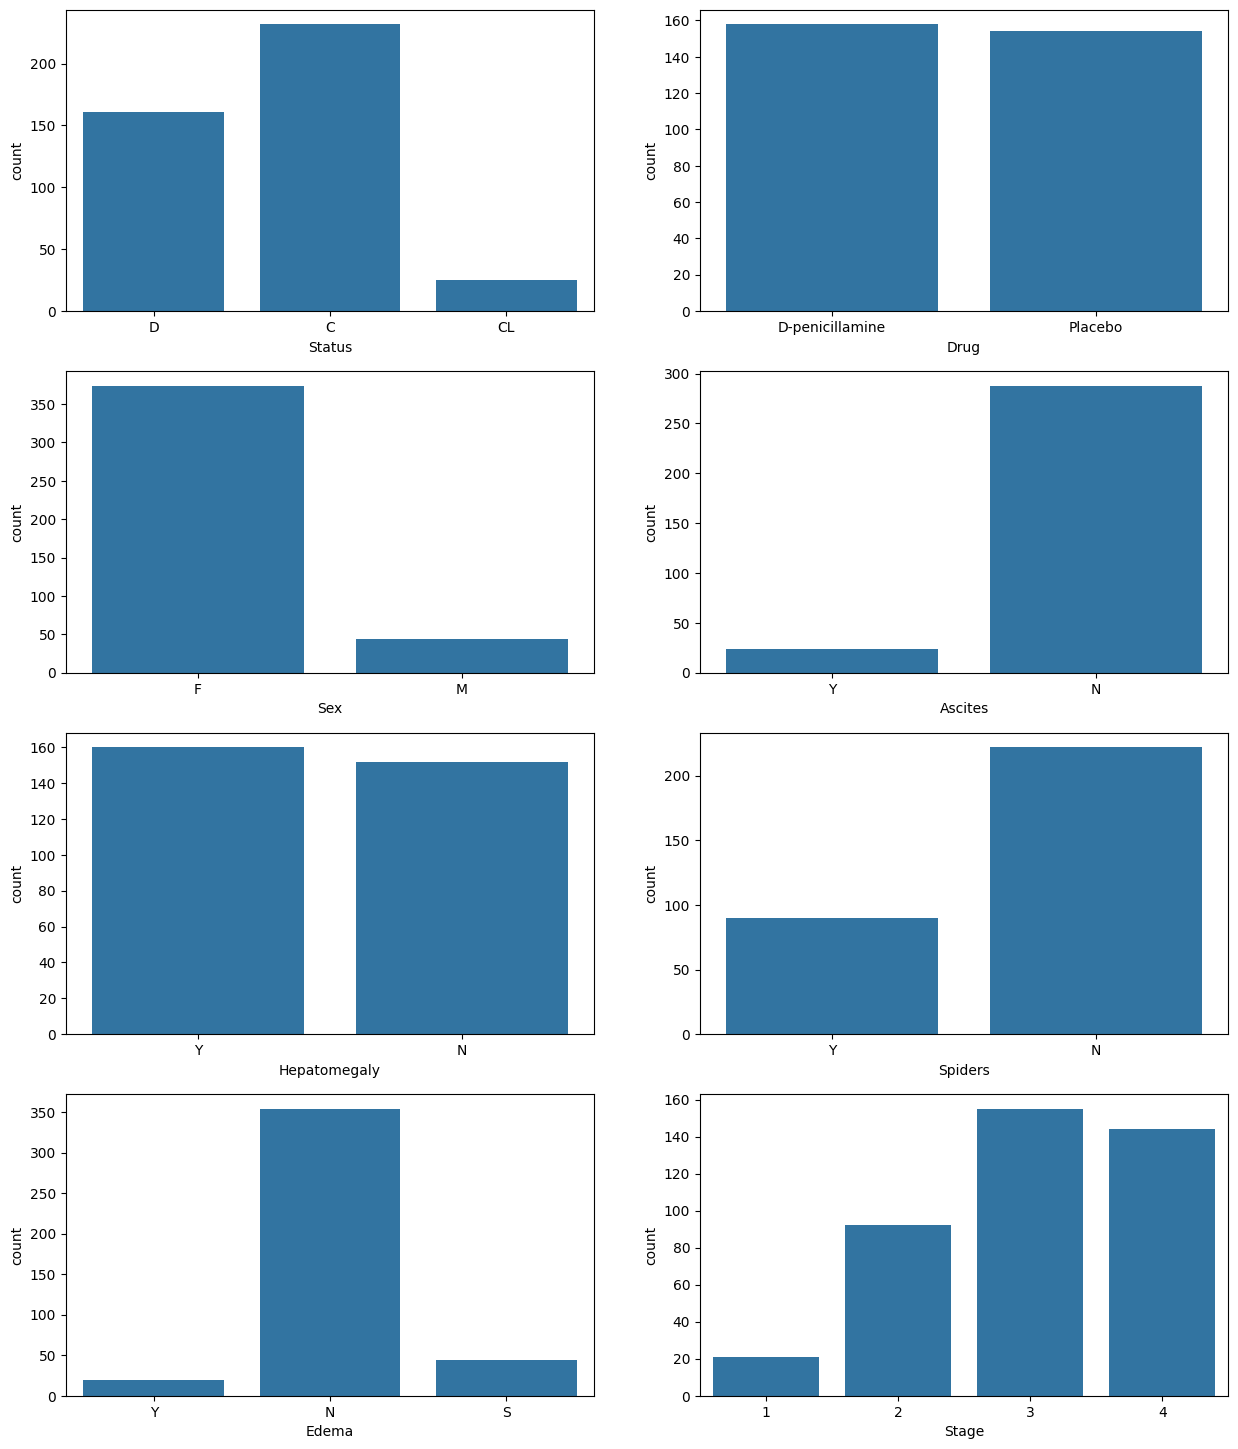

In [20]:
plt.figure(figsize=(15,18))
for i, col in enumerate(cat_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df,x=col)

## VARIABLES NUMÈRIQUES & OUTLIERS

Visualitzem les distribucions de les variables mitjançant histogrames i boxplots. 

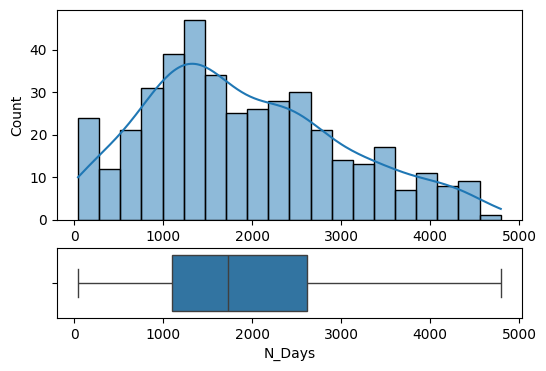

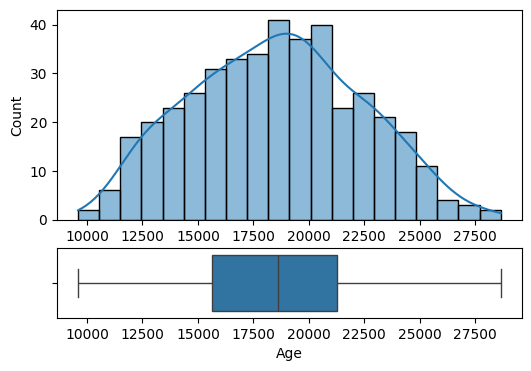

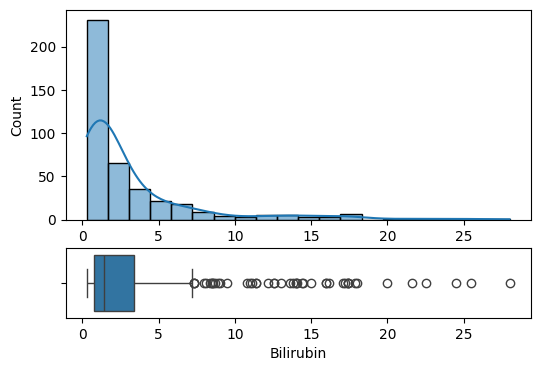

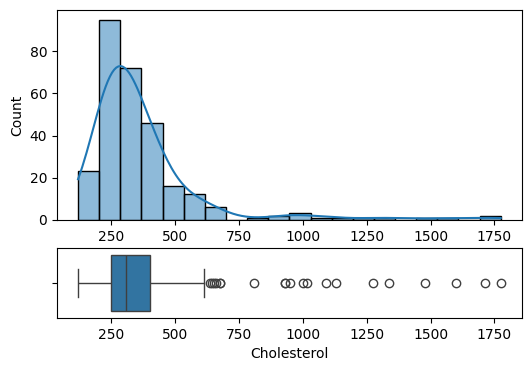

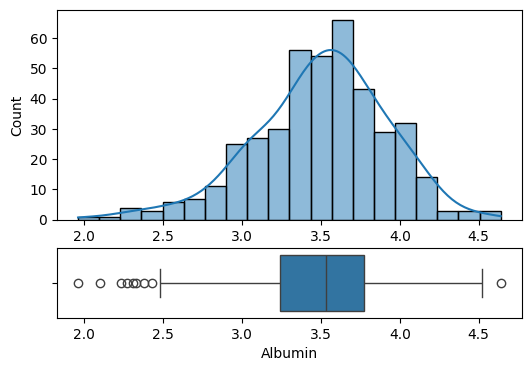

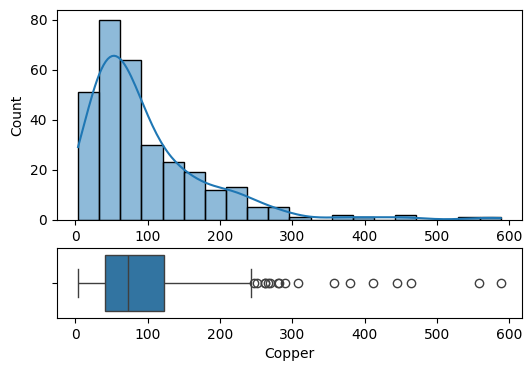

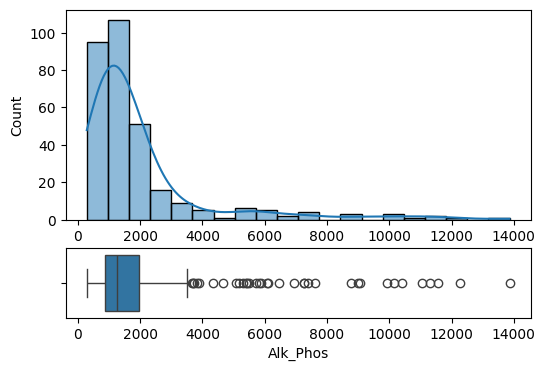

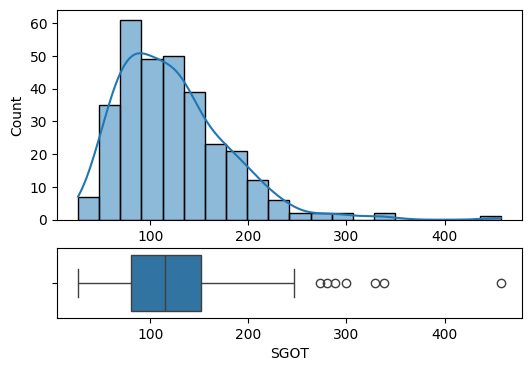

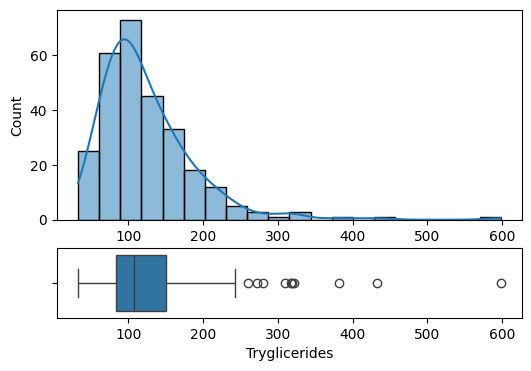

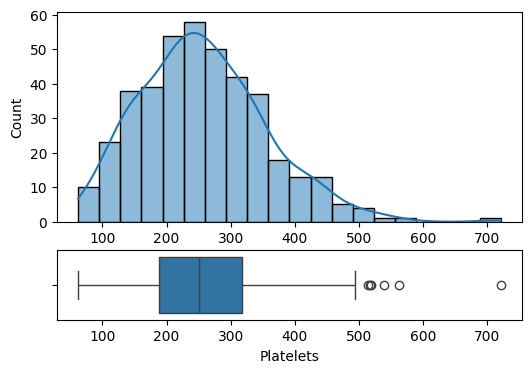

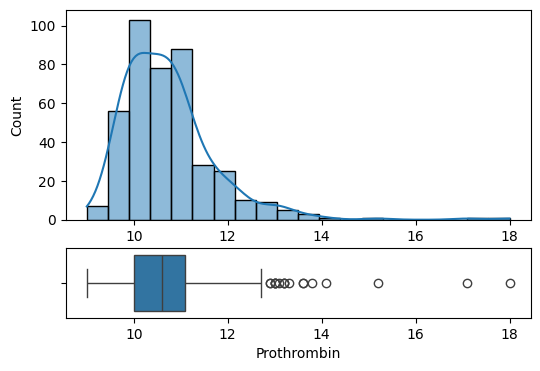

In [21]:
for i, col in enumerate(numerical_features):
        fig, axes = plt.subplots(2,1,figsize=(6,4), height_ratios=(3,1))
        sns.histplot(data=df[col], bins=20, ax=axes[0], kde=True)
        sns.boxplot(data=df[col], ax=axes[1], orient='h')

MItjaçant els histogrames anteriors ja es pot veure que a algunes variables numèriques apareixen observacions atípiques. Observem que a totes les variables numèriques excepte 'Ndays' i 'Age' apareixen outliers. Per detectar-les més precisament, calculem l'interval en el qual no es detecten com a outliers mitjançant els quartils del boxplots.

In [22]:
for i, col in enumerate(numerical_features[2:]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    #Cutting point values for this var
    print(f"Below {col}, I\'m assuming everything is an outlier:", Q1 - (1.5*IQR))
    print(f"Above {col}, I\'m assuming everything is an outlier:", Q3 + (1.5*IQR))
    #Let's get the list of samples that are below and above the thresholds
    small_outliers = df[col] < (Q1 - 1.5 * IQR)
    big_outliers = df[col] > (Q3 + 1.5 * IQR)
    print(f"Varible: {col}, Small outliers: {sum(small_outliers)}, Big outliers: {sum(big_outliers)}")
    print('\n')

Below Bilirubin, I'm assuming everything is an outlier: -3.0999999999999996
Above Bilirubin, I'm assuming everything is an outlier: 7.299999999999999
Varible: Bilirubin, Small outliers: 0, Big outliers: 46


Below Cholesterol, I'm assuming everything is an outlier: 23.75
Above Cholesterol, I'm assuming everything is an outlier: 625.75
Varible: Cholesterol, Small outliers: <NA>, Big outliers: <NA>


Below Albumin, I'm assuming everything is an outlier: 2.4512500000000004
Above Albumin, I'm assuming everything is an outlier: 4.561249999999999
Varible: Albumin, Small outliers: 8, Big outliers: 1


Below Copper, I'm assuming everything is an outlier: -81.375
Above Copper, I'm assuming everything is an outlier: 245.625
Varible: Copper, Small outliers: <NA>, Big outliers: <NA>


Below Alk_Phos, I'm assuming everything is an outlier: -791.25
Above Alk_Phos, I'm assuming everything is an outlier: 3642.75
Varible: Alk_Phos, Small outliers: 0, Big outliers: 35


Below SGOT, I'm assuming everythi

Provem d'eliminar els outliers, a veure si les distribucions canvien.

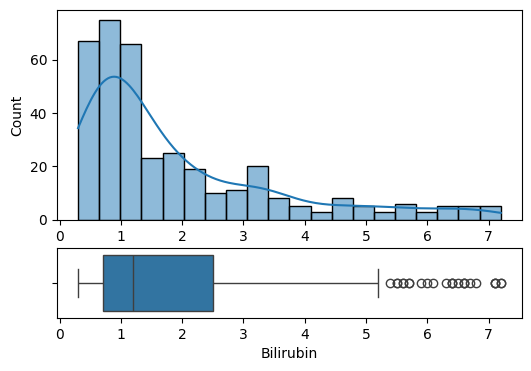

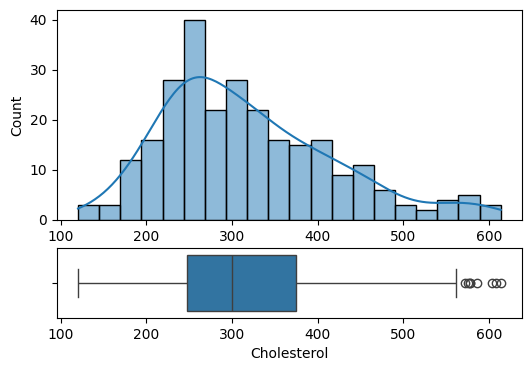

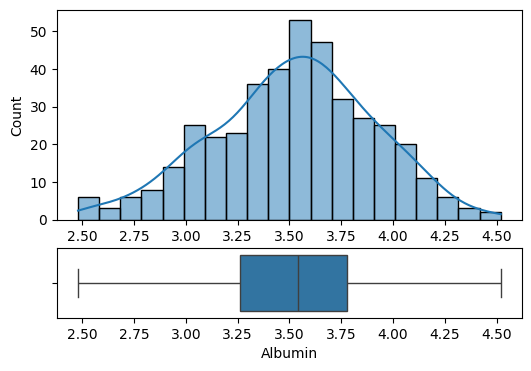

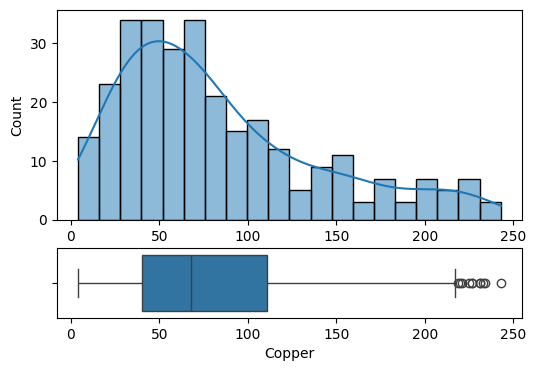

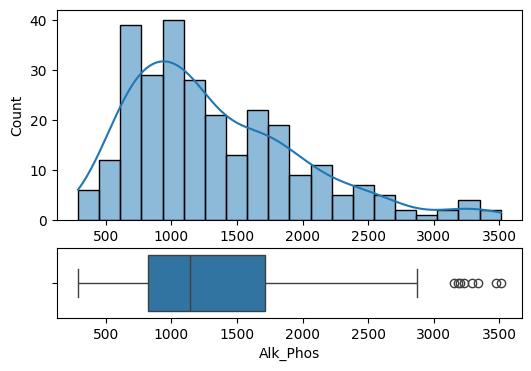

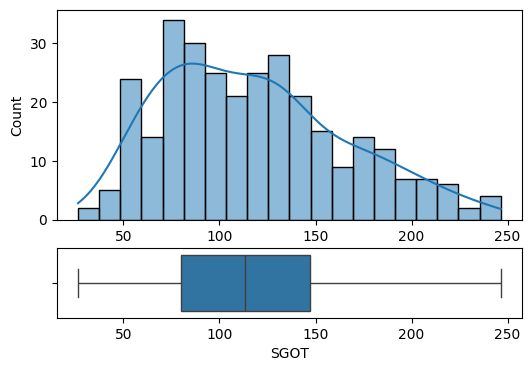

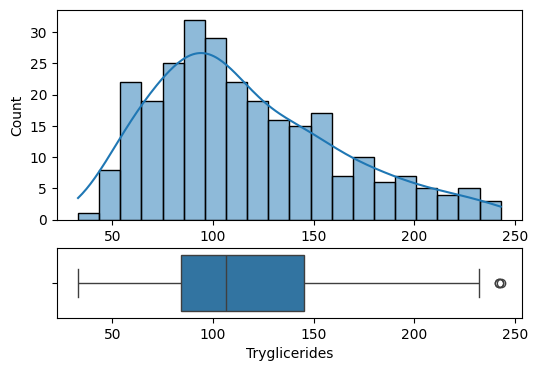

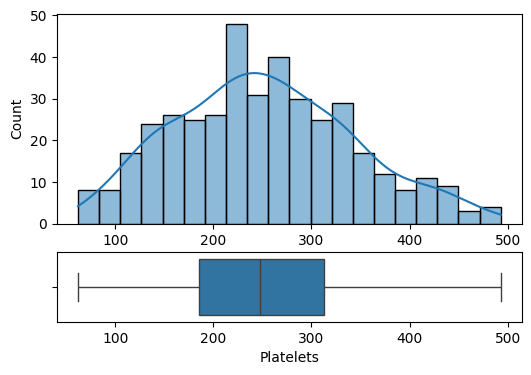

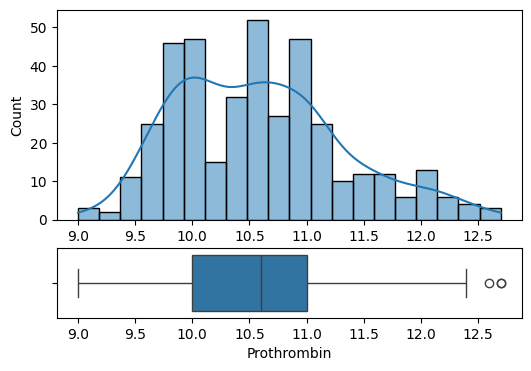

In [23]:
for i, col in enumerate(numerical_features[2:]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    small_outliers = df[col] < (Q1 - 1.5 * IQR)
    big_outliers = df[col] > (Q3 + 1.5 * IQR)

    fig, axes = plt.subplots(2,1,figsize=(6,4), height_ratios=(3,1))
    sns.histplot(data=df[col][~(small_outliers | big_outliers)], bins=20, ax=axes[0], kde=True)
    sns.boxplot(data=df[col][~(small_outliers | big_outliers)], ax=axes[1], orient='h')

## PARTICIÓ DE DADES

Com que en la base de dades hi ha molt poques mostres, considerem important conservar la major part de les informacions per la construcció de models i abandonar la part per a la validació dels models. La proporció entre "train" i "test" ha sigut 8:2, una proporció bastant habitual.

In [24]:
X = df.loc[:, df.columns != "Status"]
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('mida original:', (X.shape[0], X.shape[1]+1))
print('mida train:', (X_train.shape[0], X_train.shape[1]+1))
print('mida test:', (X_test.shape[0], X_test.shape[1]+1))

mida original: (418, 19)
mida train: (334, 19)
mida test: (84, 19)


In [25]:
#FEM CÒPIES DE LES DADES PER PODER PROCESSAR PIPELINE DESPRÉS...
X_train_pipe = pd.DataFrame.copy(X_train,deep=True)
X_test_pipe = pd.DataFrame.copy(X_test,deep=True)
y_train_pipe = pd.DataFrame.copy(y_train,deep=True)
y_test_pipe = pd.DataFrame.copy(y_test,deep=True)

## IMPUTACIÓ DE MISSINGS

Veure el percentatage de missings en cada variable...

In [26]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (418, 19)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         418 non-null    int64   
 1   Status         418 non-null    object  
 2   Drug           312 non-null    object  
 3   Age            418 non-null    int64   
 4   Sex            418 non-null    object  
 5   Ascites        312 non-null    object  
 6   Hepatomegaly   312 non-null    object  
 7   Spiders        312 non-null    object  
 8   Edema          418 non-null    object  
 9   Bilirubin      418 non-null    float64 
 10  Cholesterol    284 non-null    Int64   
 11  Albumin        418 non-null    float64 
 12  Copper         310 non-null    Int64   
 13  Alk_Phos       312 non-nul

Per a les variables numèriques, es utilitzarà la imputació amb mediana.

In [27]:
imp_num = SimpleImputer(strategy="median")
X_num_imp = pd.DataFrame(imp_num.fit_transform(X_train[numerical_features]))
X_num_imp = X_num_imp.rename(columns={i: numerical_features[i] for i in range(len(numerical_features))})
#Convertir float a int
to_int = list(cirrhosis_patient_survival_prediction.variables["name"][cirrhosis_patient_survival_prediction.variables["type"] == "Integer"])[1:]
for col in to_int:
    X_num_imp[col] = X_num_imp[col].astype('Int64')

In [28]:
X_num_imp_test = pd.DataFrame(imp_num.transform(X_test[numerical_features]))
X_num_imp_test = X_num_imp_test.rename(columns={i: numerical_features[i] for i in range(len(numerical_features))})
#Convertir float a int
for col in to_int:
    X_num_imp_test[col] = X_num_imp_test[col].astype('Int64')

Per a les variables categòriques no ordinals, es crearà una nova modalitat "Unknown" pels valors buits.

In [29]:
imp_cat = SimpleImputer(strategy="constant", fill_value="Unknown")
X_cat_imp = pd.DataFrame(imp_cat.fit_transform(X_train[cat_features[1:-1]]))
X_cat_imp = X_cat_imp.rename(columns={i: cat_features[i+1] for i in range(len(cat_features)-2)})

In [30]:
X_cat_imp_test = X_test[cat_features[1:-1]]

In [31]:
X_cat_imp_test = pd.DataFrame(imp_cat.transform(X_cat_imp_test))
X_cat_imp_test = X_cat_imp_test.rename(columns={i: cat_features[i+1] for i in range(len(cat_features)-2)})

Per a les variables ordinals, es imputarà amb la moda.

In [32]:
imp_ord = SimpleImputer(strategy="most_frequent")
X_ord_imp = pd.DataFrame(imp_ord.fit_transform(X_train["Stage"].to_numpy().reshape(-1, 1)))
X_ord_imp = X_ord_imp.rename(columns={0: "Stage"})
#transformar de nou la variable Stage a ordinal...perquè els barplots surtin en ordre correcte...
X_ord_imp["Stage"] = X_ord_imp["Stage"].astype('category')
ordre_categories = ['1', '2', '3', '4']
X_ord_imp['Stage'] = X_ord_imp['Stage'].cat.rename_categories(novas_etiquetas)
X_ord_imp['Stage'] = X_ord_imp['Stage'].cat.reorder_categories(ordre_categories, ordered=True)

In [33]:
X_ord_imp_test = pd.DataFrame(imp_ord.fit_transform(X_test["Stage"].to_numpy().reshape(-1, 1)))
X_ord_imp_test = X_ord_imp_test.rename(columns={0: "Stage"})
#transformar de nou la variable Stage a ordinal...perquè els barplots surtin en ordre correcte...
X_ord_imp_test["Stage"] = X_ord_imp_test["Stage"].astype('category')
ordre_categories = ['1', '2', '3', '4']
X_ord_imp_test['Stage'] = X_ord_imp_test['Stage'].cat.rename_categories(novas_etiquetas)
X_ord_imp_test['Stage'] = X_ord_imp_test['Stage'].cat.reorder_categories(ordre_categories, ordered=True)

In [34]:
X_cat_imp = pd.concat([X_cat_imp, X_ord_imp],axis=1)
X_cat_imp_test = pd.concat([X_cat_imp_test, X_ord_imp_test],axis=1)

## ANÀLISIS DE VARIABLES DESPRÉS DEL PREPROCESSAMENT

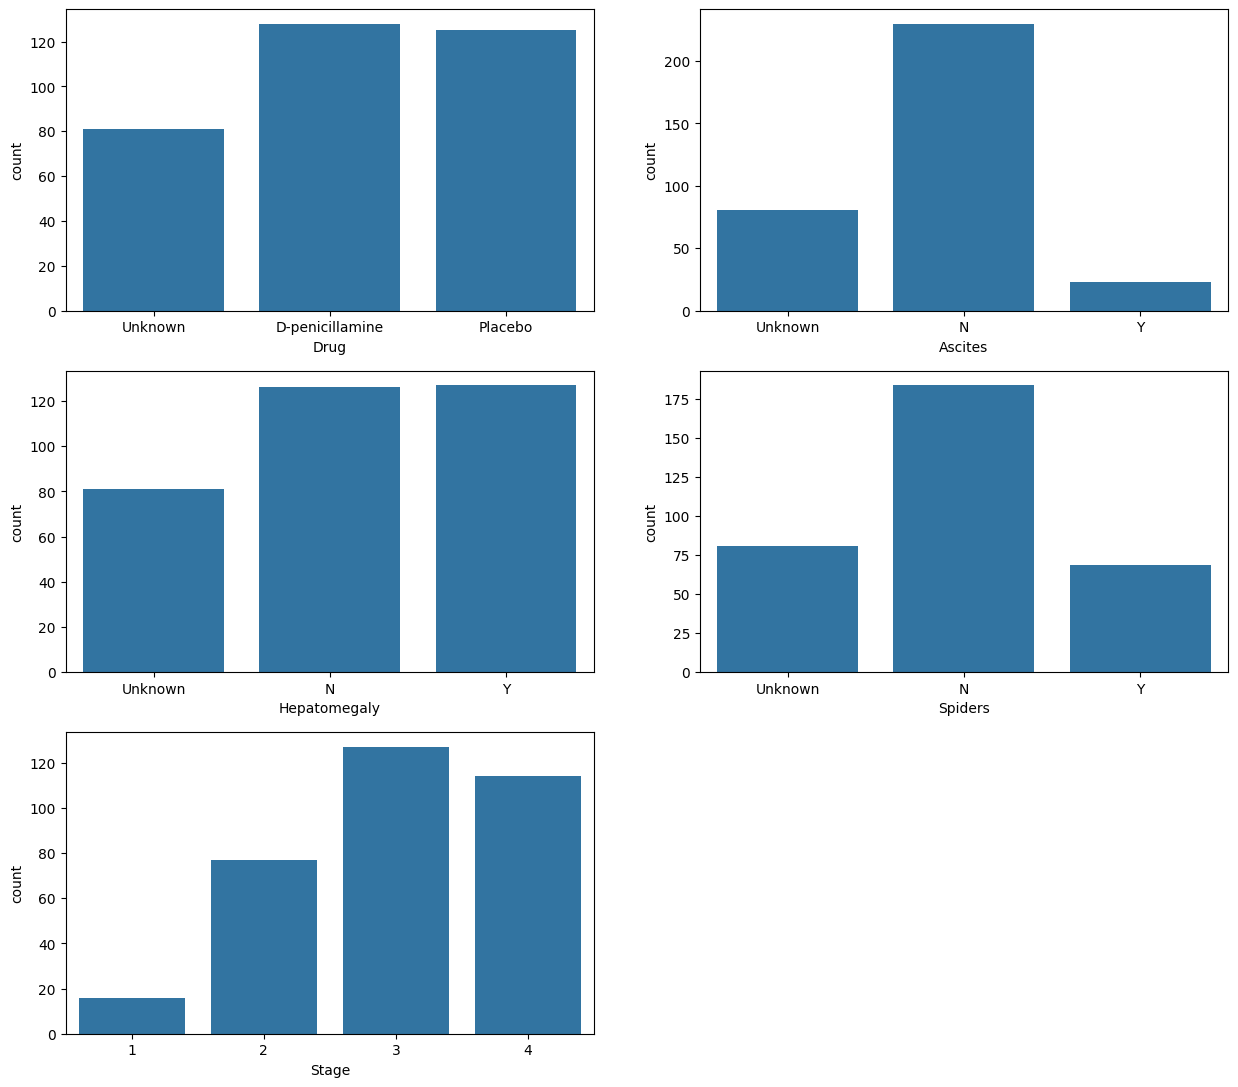

In [35]:
cat_features_with_missings = ["Drug", "Ascites", "Hepatomegaly", "Spiders", "Stage"]
plt.figure(figsize=(15,18))
for i, col in enumerate(cat_features_with_missings):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=X_cat_imp,x=col)

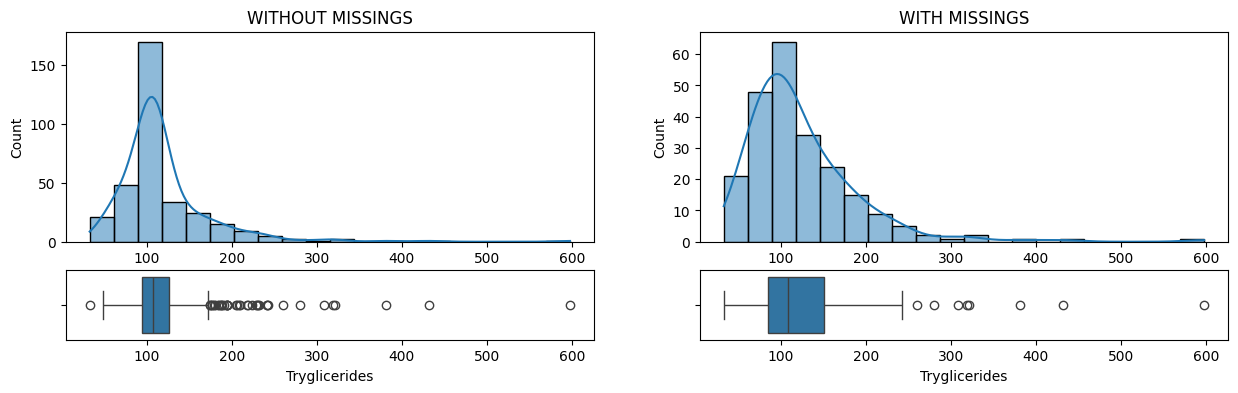

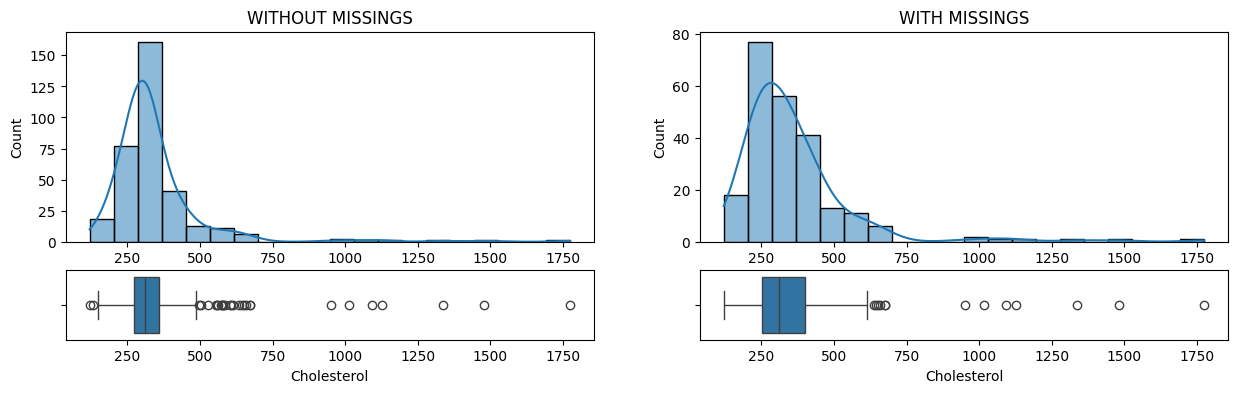

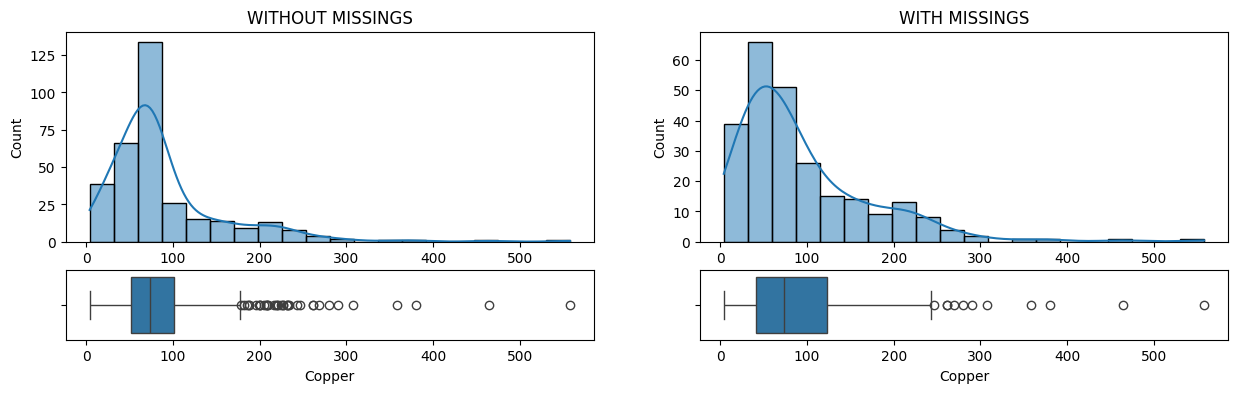

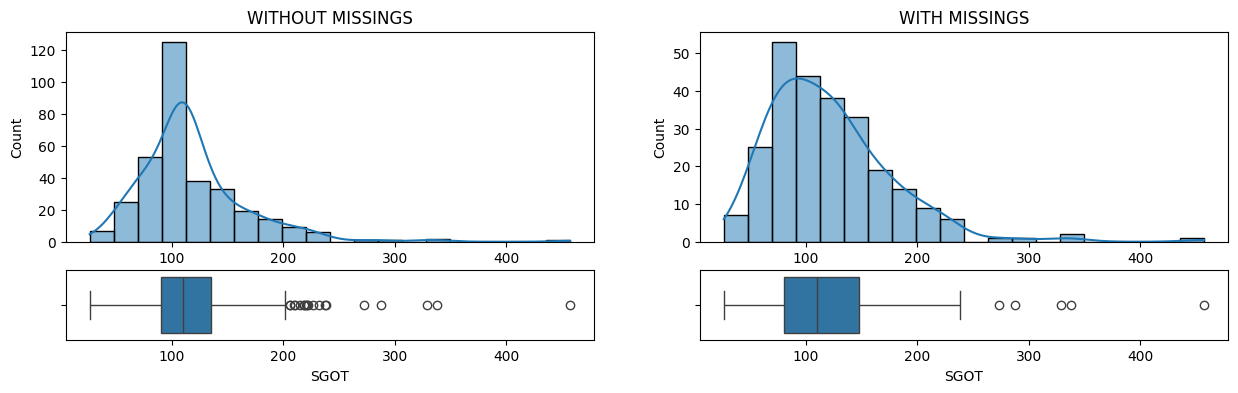

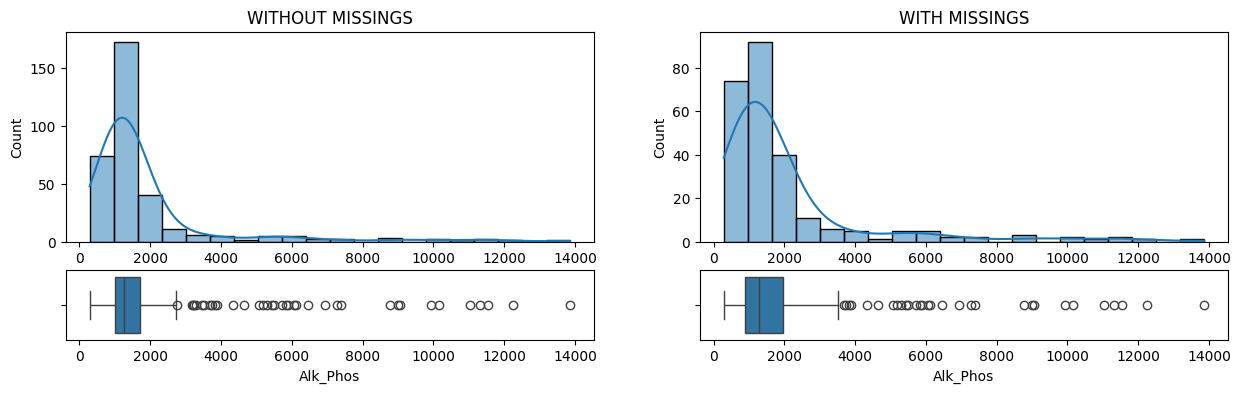

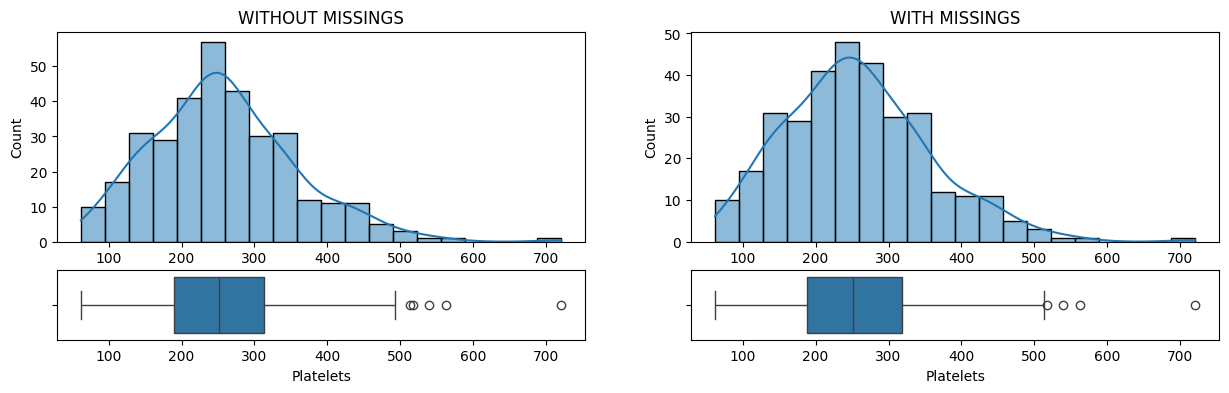

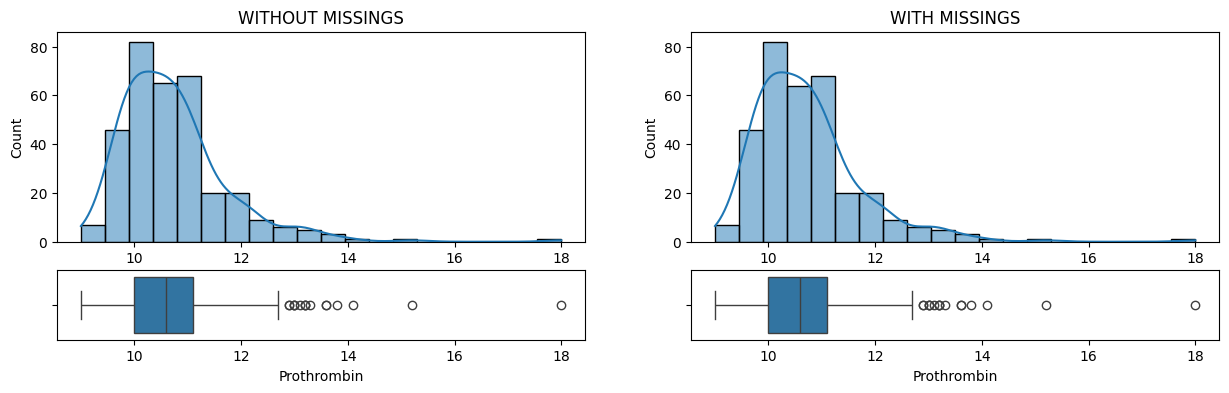

In [36]:
numerical_features_with_missings = ["Tryglicerides", "Cholesterol", "Copper", "SGOT", "Alk_Phos", "Platelets", "Prothrombin"]
for i, col in enumerate(numerical_features_with_missings):
        fig, axes = plt.subplots(2,2,figsize=(15,4), height_ratios=(3,1))
        axes[0][0].set_title("WITHOUT MISSINGS")
        sns.histplot(data=X_num_imp[col], bins=20, ax=axes[0][0], kde=True)
        sns.boxplot(data=X_num_imp[col], ax=axes[1][0], orient='h')
        axes[0][1].set_title("WITH MISSINGS")
        sns.histplot(data=X_train[col], bins=20, ax=axes[0][1], kde=True)
        sns.boxplot(data=X_train[col], ax=axes[1][1], orient='h')

Guardem les bases de dades imputades...

In [37]:
X_train = pd.concat([X_num_imp, X_cat_imp], axis=1)
X_test = pd.concat([X_num_imp_test,  X_cat_imp_test], axis=1)

In [38]:
#Assegurem que no hi ha més missings 
data_explore(X_train)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (334, 18)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         334 non-null    Int64   
 1   Age            334 non-null    Int64   
 2   Bilirubin      334 non-null    float64 
 3   Cholesterol    334 non-null    Int64   
 4   Albumin        334 non-null    float64 
 5   Copper         334 non-null    Int64   
 6   Alk_Phos       334 non-null    float64 
 7   SGOT           334 non-null    float64 
 8   Tryglicerides  334 non-null    Int64   
 9   Platelets      334 non-null    Int64   
 10  Prothrombin    334 non-null    float64 
 11  Drug           334 non-null    object  
 12  Sex            334 non-null    object  
 13  Ascites        334 non-nul

In [39]:
y_train.value_counts().sum()

334

## RECODIFICACIÓ DE VARIABLES

ONE-HOT-ENCONDING (get_dummies) per a variables categòriques no ordinals i ORDINAL-ENCONDING per la ordinal ("Stage")

In [40]:
X_train_rec = pd.get_dummies(X_train, columns = cat_features[1:-1]) 
X_test_rec = pd.get_dummies(X_test, columns = cat_features[1:-1]) 

In [41]:
oe = OrdinalEncoder()
X_train_rec["Stage"] = oe.fit_transform(X_train["Stage"].to_numpy().reshape(-1, 1))
X_test_rec["Stage"] = oe.transform(X_test["Stage"].to_numpy().reshape(-1, 1))

In [42]:
#Ha augmentat el nombre de variables
data_explore(X_train_rec)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (334, 29)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                334 non-null    Int64  
 1   Age                   334 non-null    Int64  
 2   Bilirubin             334 non-null    float64
 3   Cholesterol           334 non-null    Int64  
 4   Albumin               334 non-null    float64
 5   Copper                334 non-null    Int64  
 6   Alk_Phos              334 non-null    float64
 7   SGOT                  334 non-null    float64
 8   Tryglicerides         334 non-null    Int64  
 9   Platelets             334 non-null    Int64  
 10  Prothrombin           334 non-null    float64
 11  Stage                 334 non-null    

## NORMALITZACIÓ DE LES VARIABLES

L'estandardització de les variables és necessària, ja que aplicarem algorismes que es basen en distàncies.

In [43]:
sc = StandardScaler()
X_train_rec[numerical_features]= sc.fit_transform(X_train_rec[numerical_features])
X_test_rec[numerical_features] = sc.transform(X_test_rec[numerical_features])

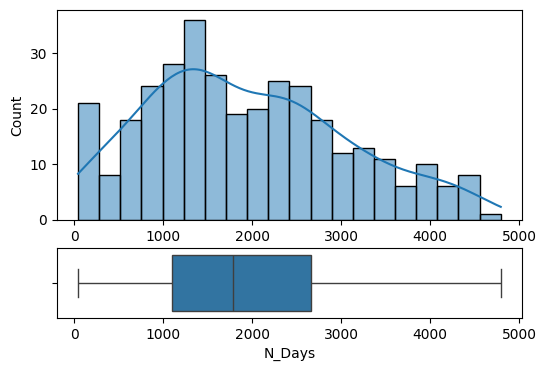

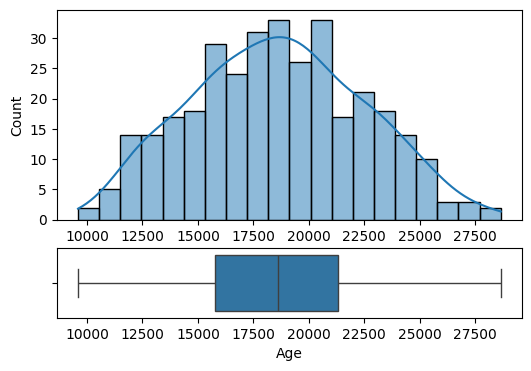

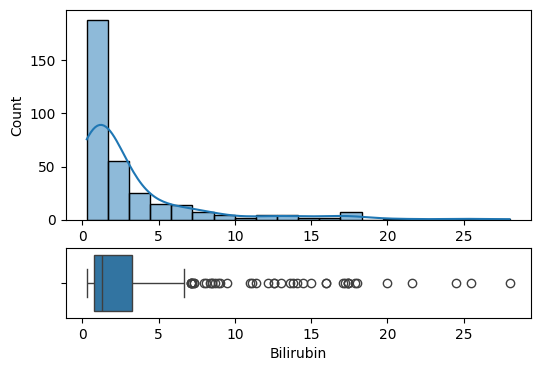

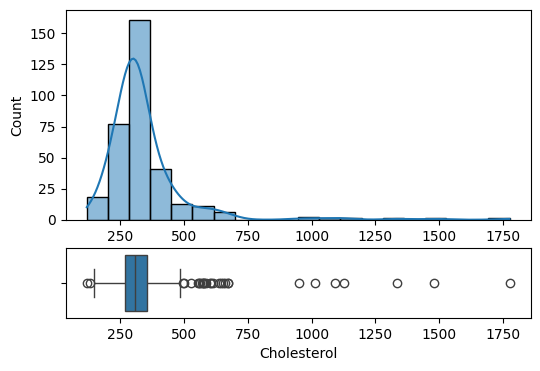

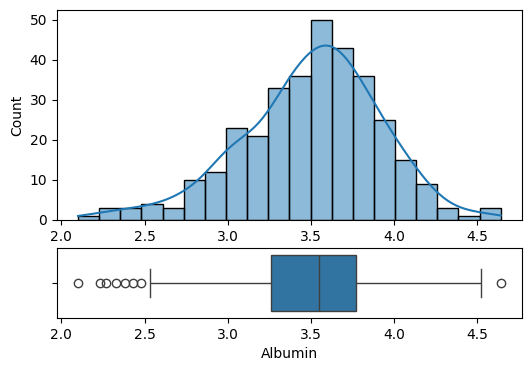

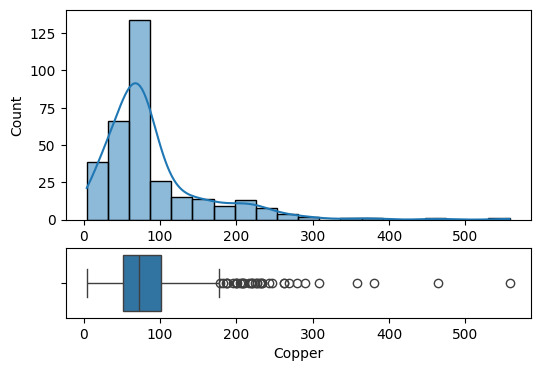

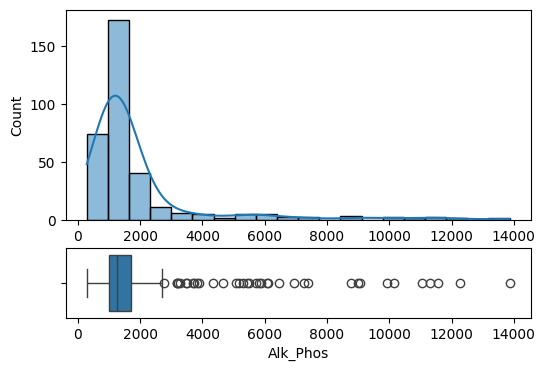

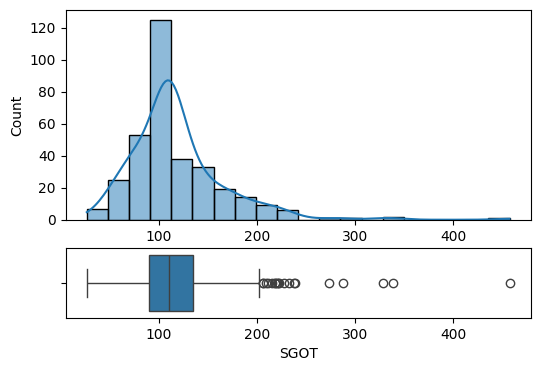

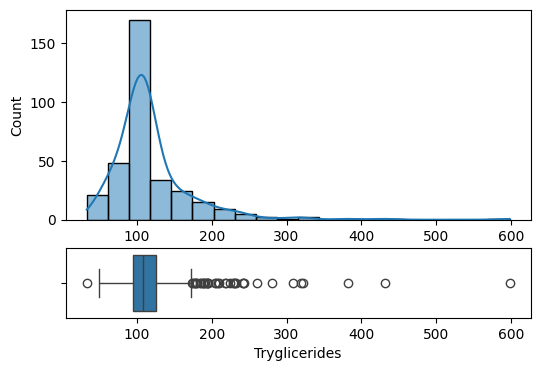

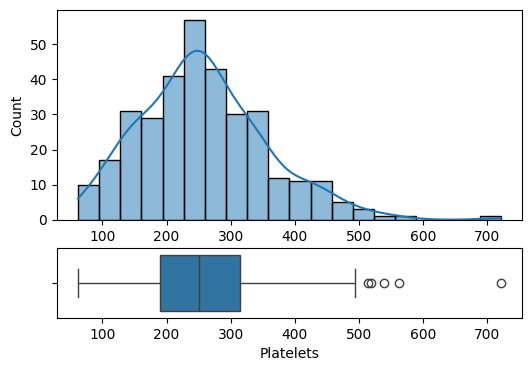

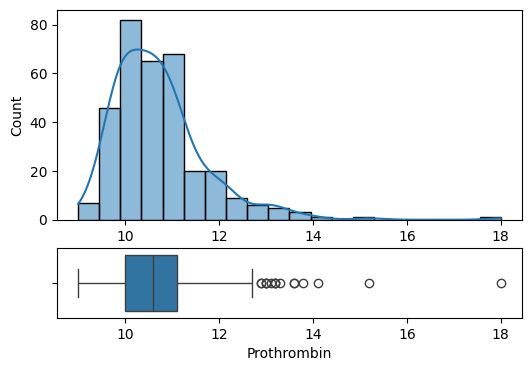

In [44]:
for i, col in enumerate(numerical_features):
        fig, axes = plt.subplots(2,1,figsize=(6,4), height_ratios=(3,1))
        sns.histplot(data=X_train[col], bins=20, ax=axes[0], kde=True)
        sns.boxplot(data=X_train[col], ax=axes[1], orient='h')

## ANÀLISIS DE CORRELACIONS ENTRE LES VARIABLES NUMÈRIQUES

Totes les parelles de variables tenen correlació baixa, la qual cosa vol dir que totes elles aporten informacions diferents, per tant, no eliminem cap variable numèriques

In [45]:
# Measuring correlations
corr = np.round(X_train_rec[numerical_features].corr(), 2)
# Filtering redundant values
mask = np.triu(np.ones_like(corr, dtype = bool))
c_mask = np.where(~mask, corr, 100)

c = []
for i in c_mask.tolist()[1:]:
    c.append([x for x in i if x != 100])

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=c[::-1],
                                  x=corr.index.tolist()[:-1],
                                  y=corr.columns.tolist()[1:][::-1],
                                  colorscale = 'Magenta')

fig.update_layout(title = {'text': '<b>Correlation Among Independent Features</b>',
                           'x': 0.05, 'xanchor': 'left'},
                  margin = dict(t=210, l = 110),
                  yaxis = dict(autorange = 'reversed', showgrid = False),
                  xaxis = dict(showgrid = False),
                  plot_bgcolor = '#F6F5F5',
                  paper_bgcolor = '#F6F5F5',
                  height = 950, width = 950)
                     

fig.add_trace(go.Heatmap(z = c[::-1],
                         colorscale = 'Magenta',
                         showscale = True,
                         visible = False))
fig.data[1].visible = True
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 12

fig.show()

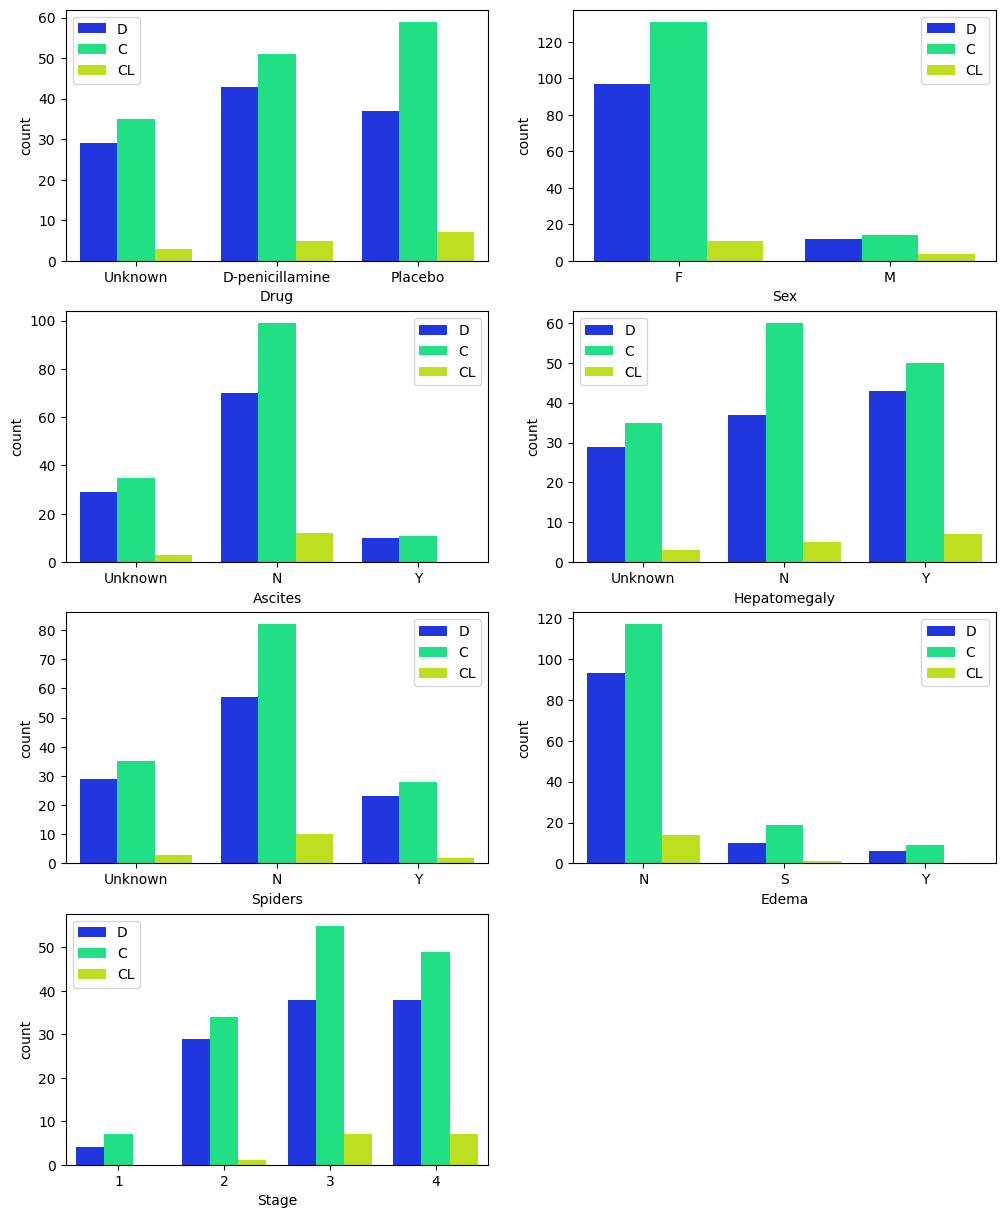

In [46]:
plt.figure(figsize=(12,15))
for i, col in enumerate(cat_features[1:]):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=X_train,x=col,hue =y_train,palette='gist_rainbow_r')
    plt.legend(loc = "best")

Sembla que la variable "Drug" no té cap impacte sobre la variable resposta, a més, té un percentatge de missings molt alt, llavors podem considerar que és una variable sorollosa: l'eliminem.

In [47]:
X_train = X_train.drop("Drug", axis=1)
X_test = X_test.drop("Drug", axis=1)
X_train_pipe = X_train_pipe.drop("Drug", axis=1)
X_test_pipe = X_test_pipe.drop("Drug", axis=1)

In [48]:
X_train_rec = X_train_rec.drop(["Drug_D-penicillamine", "Drug_Placebo", "Drug_Unknown"], axis=1)
X_test_rec = X_test_rec.drop(["Drug_D-penicillamine", "Drug_Placebo", "Drug_Unknown"], axis=1)

## ESTUDI DE DIMENSIONALITAT AMB PCA

Cal reduir la dimensionalitat per visualitzar les dades perquè tenim més de dues (tres) variables numèriques.

In [49]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_rec)
print("Variància explicada per dos components principals:", round(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1],4))

Variància explicada per dos components principals: 0.3652


Amb dos components principals obtenim un 36.52% de variància explicada. 

Altrament, encara que els últims components no aporten tanta informació, considerem millor no eliminar-les per substituir les variables originals per elles, perquè abans de fer recodificació hi havia només 18 variables independents que explicava 100% de variància. Aquí amb 18 variables s'explica un 90% aproxidament. Pensem que és millor fins i tot no fer recodifcació que utilitzar components que conserven major part de la informació com a variables de la base

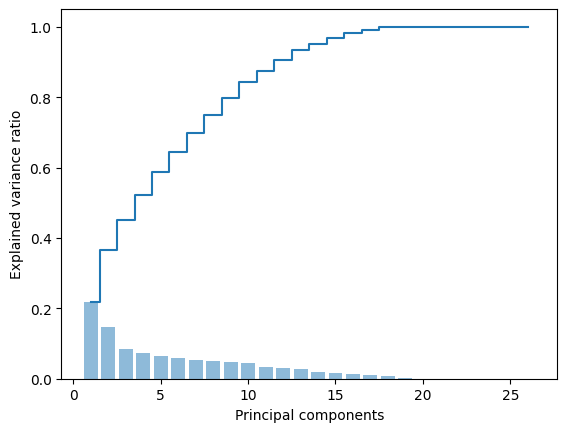

In [50]:
plt.bar(range(1, X_train_pca.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, X_train_pca.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

Després de reduir fins a dos dimensions es veu que els punts (mostres) es concentren en un lloc, amb una desviació petita, la qual cosa dificulta la tasca de classificació...

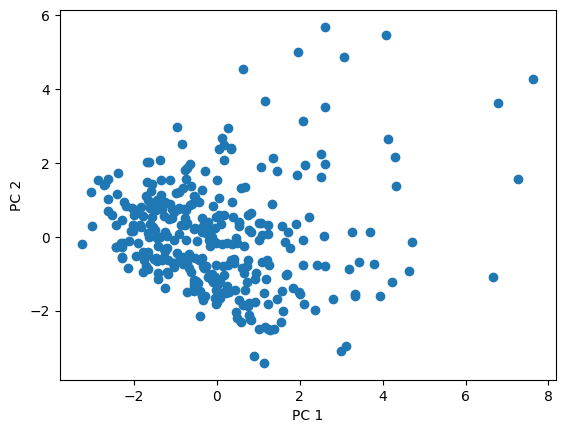

In [51]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_rec)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

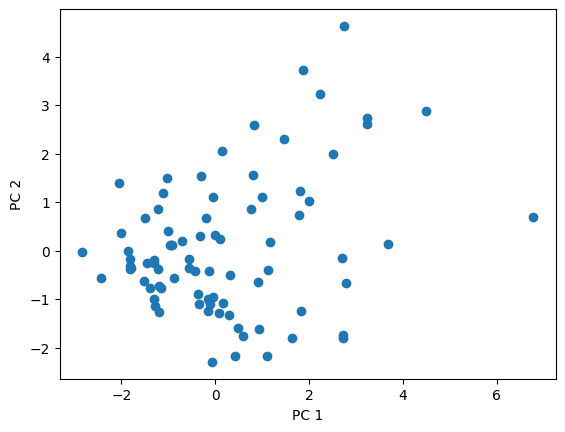

In [52]:
X_test_pca = pca.transform(X_test_rec)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## DEFINICIÓ DE MODELS

Una petita prova prèvia sense utilitzar pipeline per comprovar que el preprocessament fet funcioni per a les construccions dels models...

In [53]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train_rec, y_train)
y_pred = knn.predict(X_test_rec)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy:', round(accuracy_score(y_test, y_pred),2))

print(classification_report(y_pred, y_test, target_names=y_train.unique()))
results_df = save_results(knn, X_test_rec, y_test, 'KNN', results_df)

Misclassified examples: 27
Accuracy: 0.68
              precision    recall  f1-score   support

           D       0.84      0.72      0.77        57
           C       0.00      0.00      0.00         1
          CL       0.53      0.62      0.57        26

    accuracy                           0.68        84
   macro avg       0.46      0.44      0.45        84
weighted avg       0.73      0.68      0.70        84



In [55]:
results_df

,test acc,precision score (W),recall score (W),f1 score (W)
KNN,0.678571,0.639371,0.678571,0.655339


## KNN

In [56]:
scoring = ["balanced_accuracy", "f1_weighted"]
knn_scores = {"Balanced accuracy VAL": [],  "F1-score (W) VAL": [], "Balanced accuracy TRAIN": [],  "F1-score (W) TRAIN": []}
knn_index = []

Utilitzant tot el preprocessament que vam fer abans... Però no es pot aplicar class_weight al model KNN... el seu paràmetre és diferents als dels altres models...

In [57]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(handle_unknown="ignore"),
)
ord_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [58]:
#RESULTAT AMB VAL
knn1 = make_pipeline(preprocessor_linear, KNeighborsClassifier())
knn_index += ["KNN"]
cv_result = cross_validate(knn1, X_train_pipe, y_train_pipe, scoring=scoring)
knn_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
knn_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
knn_scores

{'Balanced accuracy VAL': [0.5319293652626985],
 'F1-score (W) VAL': [0.7124977405232883],
 'Balanced accuracy TRAIN': [],
 'F1-score (W) TRAIN': []}

In [59]:
y_pred = cross_val_predict(knn1, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.89      0.71      0.79       227
          CL       0.10      0.40      0.16         5
           D       0.59      0.75      0.66       102

    accuracy                           0.72       334
   macro avg       0.52      0.62      0.54       334
weighted avg       0.78      0.72      0.74       334



In [60]:
#RESULTAT AMB TRAIN
X_train = pd.DataFrame(preprocessor_linear.fit_transform(X_train_pipe, y_train_pipe))
knn1 = KNeighborsClassifier().fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, knn1.predict(X_train))
scores2 = f1_score(y_train, knn1.predict(X_train), average='weighted')
knn_scores["Balanced accuracy TRAIN"].append(scores1)
knn_scores["F1-score (W) TRAIN"].append(scores2)

Utilitzant algun mètode de Resampling: SMOTE and Tomek per compensar la falta de haver de donar pesos a les classes

In [61]:
knn2 = make_pipeline_with_sampler(preprocessor_linear, SMOTETomek(random_state=1), KNeighborsClassifier())
knn_index += ["KNN + SMOTENC"]
cv_result = cross_validate(knn2, X_train_pipe, y_train_pipe, scoring=scoring)
knn_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
knn_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
knn_scores

{'Balanced accuracy VAL': [0.5319293652626985, 0.4723903390570058],
 'F1-score (W) VAL': [0.7124977405232883, 0.5869569975672744],
 'Balanced accuracy TRAIN': [0.5984642444972817],
 'F1-score (W) TRAIN': [0.7809856120197843]}

In [62]:
y_pred = cross_val_predict(knn2, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.63      0.76      0.69       151
          CL       0.35      0.09      0.15        76
           D       0.56      0.69      0.62       107

    accuracy                           0.59       334
   macro avg       0.51      0.52      0.49       334
weighted avg       0.54      0.59      0.54       334



In [63]:
knn2 = make_pipeline_with_sampler(preprocessor_linear, SMOTETomek(random_state=1))
X_train, y_train_s = knn2.fit_resample(X_train_pipe, y_train_pipe)
knn2 = KNeighborsClassifier().fit(X_train, y_train_s)
scores1 = balanced_accuracy_score(y_train_s, knn2.predict(X_train))
scores2 = f1_score(y_train_s, knn1.predict(X_train), average='weighted')
knn_scores["Balanced accuracy TRAIN"].append(scores1)
knn_scores["F1-score (W) TRAIN"].append(scores2)

Sembla que no ha millorat gaire... Utilitzem OverSampling a veure...

In [64]:
knn3 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1), KNeighborsClassifier())
knn_index += ["KNN + Oversampling"]
cv_result = cross_validate(knn3, X_train_pipe, y_train_pipe, scoring=scoring)
knn_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
knn_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
knn_scores

{'Balanced accuracy VAL': [0.5319293652626985,
  0.4723903390570058,
  0.5116757783424449],
 'F1-score (W) VAL': [0.7124977405232883,
  0.5869569975672744,
  0.6566177709255795],
 'Balanced accuracy TRAIN': [0.5984642444972817, 0.8685714285714287],
 'F1-score (W) TRAIN': [0.7809856120197843, 0.5864595190708491]}

In [65]:
y_pred = cross_val_predict(knn3, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.69      0.76      0.72       168
          CL       0.20      0.07      0.11        56
           D       0.56      0.67      0.61       110

    accuracy                           0.61       334
   macro avg       0.49      0.50      0.48       334
weighted avg       0.57      0.61      0.58       334



In [66]:
knn3 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1))
X_train, y_train_s = knn3.fit_resample(X_train_pipe, y_train_pipe)
knn3 = KNeighborsClassifier().fit(X_train, y_train_s)
scores1 = balanced_accuracy_score(y_train_s, knn3.predict(X_train))
scores2 = f1_score(y_train_s, knn1.predict(X_train), average='weighted')
knn_scores["Balanced accuracy TRAIN"].append(scores1)
knn_scores["F1-score (W) TRAIN"].append(scores2)

Continua sent molt malament, provem d'eliminar els outliers...

In [67]:
#Definim una classe per canviar els outliers pels missings
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1.5):
        self.threshold = threshold
        self.upper_bound = None
        self.lower_bound = None

    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.upper_bound = q3 + self.threshold * iqr
        self.lower_bound = q1 - self.threshold * iqr
        return self

    def transform(self, X):
        X_outlier = X.copy()
        for column in X.columns:
            mask_upper = X_outlier[column] > self.upper_bound[column]
            mask_lower = X_outlier[column] < self.lower_bound[column]
            X_outlier.loc[mask_upper | mask_lower, column] = np.nan
        return X_outlier

In [68]:
num_pipe = make_pipeline(
    OutlierExtractor(threshold=1.5), SimpleImputer(strategy="median"), StandardScaler()
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [69]:
knn4 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1), KNeighborsClassifier())
knn_index += ["KNN + Oversampling + RemovingOutliers"]
cv_result = cross_validate(knn4, X_train_pipe, y_train_pipe, scoring=scoring)
knn_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
knn_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
knn_scores

{'Balanced accuracy VAL': [0.5319293652626985,
  0.4723903390570058,
  0.5116757783424449,
  0.5286299119632453],
 'F1-score (W) VAL': [0.7124977405232883,
  0.5869569975672744,
  0.6566177709255795,
  0.6217876064477009],
 'Balanced accuracy TRAIN': [0.5984642444972817,
  0.8685714285714287,
  0.843351548269581],
 'F1-score (W) TRAIN': [0.7809856120197843,
  0.5864595190708491,
  0.5430190582364496]}

In [70]:
y_pred = cross_val_predict(knn4, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.65      0.73      0.69       162
          CL       0.25      0.08      0.12        62
           D       0.53      0.63      0.57       110

    accuracy                           0.58       334
   macro avg       0.48      0.48      0.46       334
weighted avg       0.54      0.58      0.55       334



In [71]:
knn4 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1))
X_train, y_train_s = knn4.fit_resample(X_train_pipe, y_train_pipe)
knn4 = KNeighborsClassifier().fit(X_train, y_train_s)
scores1 = balanced_accuracy_score(y_train_s, knn4.predict(X_train))
scores2 = f1_score(y_train_s, knn1.predict(X_train), average='weighted')
knn_scores["Balanced accuracy TRAIN"].append(scores1)
knn_scores["F1-score (W) TRAIN"].append(scores2)

Canviem els hiperparàmetres per veure quina combinació és millor. Utilitzem GridSearch per fer-lo.

In [72]:
params = {'n_neighbors': [1, 2, 3, 4, 5], #no podria ser molt gran perquè la base de dades és petita
          'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(p=2),
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    refit=True,
                    scoring = 'balanced_accuracy',
                    return_train_score=True,
                    )
#grid.fit(X_train_rec, y_train) #GridSearch sobre la base de dades amb el preprocessament fet durant el treball
#grid.best_estimator_

knn5 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1), grid)
knn5.fit(X_train_pipe, y_train_pipe)
print(grid.best_estimator_)
s = [grid.cv_results_['mean_test_score'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
st= [grid.cv_results_['mean_train_score'][r] for r, _ in enumerate(grid.cv_results_['mean_train_score'])]
p = [grid.cv_results_['params'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
s_p = pd.concat([pd.DataFrame(p), pd.DataFrame(s), pd.DataFrame(st)],axis =1)
s_p.columns = ['n_neighbors', 'weights', 'score VAL', 'score TRAIN']
s_p


KNeighborsClassifier(n_neighbors=3, weights='distance')


,n_neighbors,weights,score VAL,score TRAIN
0,1,uniform,0.847466,1.000000
1,1,distance,0.847466,1.000000
2,2,uniform,0.800487,0.920463
3,2,distance,0.847466,1.000000
4,3,uniform,0.809649,0.904060
5,3,distance,0.855166,1.000000
6,4,uniform,0.796589,0.859949
7,4,distance,0.849513,1.000000
8,5,uniform,0.765595,0.839107
9,5,distance,0.827583,1.000000


Utilitzar la combinació d'hiperparàmtres que treu millor resultat en VAL. Encara que té overfitting però la puntuació en VAL no és gens baixa.

In [73]:
knn6 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1), KNeighborsClassifier(n_neighbors=3, weights='distance'))
knn_index += ["KNN + Oversampling + RemovingOutliers + GridSearchCV"]
cv_result = cross_validate(knn6, X_train_pipe, y_train_pipe, scoring=scoring)
knn_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
knn_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
knn_scores

{'Balanced accuracy VAL': [0.5319293652626985,
  0.4723903390570058,
  0.5116757783424449,
  0.5286299119632453,
  0.4886861220194554],
 'F1-score (W) VAL': [0.7124977405232883,
  0.5869569975672744,
  0.6566177709255795,
  0.6217876064477009,
  0.6543163767236988],
 'Balanced accuracy TRAIN': [0.5984642444972817,
  0.8685714285714287,
  0.843351548269581,
  0.8488160291438981],
 'F1-score (W) TRAIN': [0.7809856120197843,
  0.5864595190708491,
  0.5430190582364496,
  0.43130999823318084]}

In [74]:
y_pred = cross_val_predict(knn6, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.70      0.75      0.73       170
          CL       0.15      0.08      0.11        36
           D       0.63      0.64      0.63       128

    accuracy                           0.64       334
   macro avg       0.49      0.49      0.49       334
weighted avg       0.61      0.64      0.62       334



In [75]:
knn6 = make_pipeline_with_sampler(preprocessor_linear, RandomOverSampler(random_state=1))
X_train, y_train_s = knn6.fit_resample(X_train_pipe, y_train_pipe)
knn6 = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_train_s)
scores1 = balanced_accuracy_score(y_train_s, knn6.predict(X_train))
scores2 = f1_score(y_train_s, knn1.predict(X_train), average='weighted')
knn_scores["Balanced accuracy TRAIN"].append(scores1)
knn_scores["F1-score (W) TRAIN"].append(scores2)

In [76]:
KNN_scores = pd.DataFrame(knn_scores, index=knn_index)
KNN_scores

,Balanced accuracy VAL,F1-score (W) VAL,Balanced accuracy TRAIN,F1-score (W) TRAIN
KNN,0.531929,0.712498,0.598464,0.780986
KNN + SMOTENC,0.472390,0.586957,0.868571,0.586460
KNN + Oversampling,0.511676,0.656618,0.843352,0.543019
KNN + Oversampling + RemovingOutliers,0.528630,0.621788,0.848816,0.431310
KNN + Oversampling + RemovingOutliers + GridSearchCV,0.488686,0.654316,1.000000,0.431310


## SVM

Apliquem de nou tot el preprocessament que hem fet abans...

In [77]:
svm_scores = {"Balanced accuracy VAL": [],  "F1-score (W) VAL": [], "Balanced accuracy TRAIN": [],  "F1-score (W) TRAIN": []}
svm_index = []

In [78]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OneHotEncoder(handle_unknown="ignore")
)
ord_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [79]:
svm1 = make_pipeline(preprocessor_linear, SVC(class_weight="balanced", random_state=1))
svm_index += ["SVM + class weight balanced"]
cv_result = cross_validate(svm1, X_train_pipe, y_train_pipe, scoring=scoring)
svm_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
svm_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
svm_scores

{'Balanced accuracy VAL': [0.5865391032057699],
 'F1-score (W) VAL': [0.7038297049811003],
 'Balanced accuracy TRAIN': [],
 'F1-score (W) TRAIN': []}

In [80]:
y_pred = cross_val_predict(svm1, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.69      0.80      0.74       158
          CL       0.35      0.14      0.20        51
           D       0.73      0.76      0.74       125

    accuracy                           0.69       334
   macro avg       0.59      0.57      0.56       334
weighted avg       0.65      0.69      0.66       334



In [81]:
#RESULTAT AMB TRAIN
X_train = pd.DataFrame(preprocessor_linear.fit_transform(X_train_pipe, y_train_pipe))
svm1 =  SVC(class_weight="balanced", random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, svm1.predict(X_train))
scores2 = f1_score(y_train, svm1.predict(X_train), average='weighted')
svm_scores["Balanced accuracy TRAIN"].append(scores1)
svm_scores["F1-score (W) TRAIN"].append(scores2)

Provem l'eliminació dels outliers.

In [82]:
num_pipe = make_pipeline(
    OutlierExtractor(threshold=1.5), SimpleImputer(strategy="median"), StandardScaler()
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [83]:
svm2 = make_pipeline(preprocessor_linear, SVC(class_weight="balanced", random_state=1))
svm_index += ["SVM + class weight balanced + RemovingOutliers"]
cv_result = cross_validate(svm2, X_train_pipe, y_train_pipe, scoring=scoring)
svm_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
svm_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
svm_scores

{'Balanced accuracy VAL': [0.5865391032057699, 0.6214239880906549],
 'F1-score (W) VAL': [0.7038297049811003, 0.728237102016428],
 'Balanced accuracy TRAIN': [0.8000069522657434],
 'F1-score (W) TRAIN': [0.7779198863318953]}

In [84]:
y_pred = cross_val_predict(svm2, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.75      0.80      0.78       173
          CL       0.35      0.17      0.23        41
           D       0.68      0.74      0.71       120

    accuracy                           0.70       334
   macro avg       0.59      0.57      0.57       334
weighted avg       0.68      0.70      0.68       334



In [85]:
#RESULTAT AMB TRAIN
X_train = pd.DataFrame(preprocessor_linear.fit_transform(X_train_pipe, y_train_pipe))
svm2 =  SVC(class_weight="balanced", random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, svm2.predict(X_train))
scores2 = f1_score(y_train, svm2.predict(X_train), average='weighted')
svm_scores["Balanced accuracy TRAIN"].append(scores1)
svm_scores["F1-score (W) TRAIN"].append(scores2)

Com abans, GridSearch per trobar la millor combinació de paràmetres.

In [86]:
params = {'C': [0.01, 0.5, 1, 5, 100], 
          'kernel': ['linear', 'rbf', 'sigmoid'],
          'gamma': ['scale','auto']
          }

grid = GridSearchCV(SVC(class_weight="balanced", random_state=1),
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    refit=True,
                    scoring = 'balanced_accuracy',
                    return_train_score= True
                    )
#grid.fit(X_train_rec, y_train) #GridSearch sobre la base de dades amb el preprocessament fet durant el treball
#grid.best_estimator_

svm3 = make_pipeline(preprocessor_linear, grid)
svm3.fit(X_train_pipe, y_train_pipe)
print(grid.best_estimator_)
s = [grid.cv_results_['mean_test_score'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
st= [grid.cv_results_['mean_train_score'][r] for r, _ in enumerate(grid.cv_results_['mean_train_score'])]
p = [grid.cv_results_['params'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
s_p = pd.concat([pd.DataFrame(p), pd.DataFrame(s), pd.DataFrame(st)],axis =1)
s_p.columns = ['C', 'gamma', 'kernel', 'score VAL', 'score TRAIN']
s_p

SVC(C=0.01, class_weight='balanced', kernel='linear', random_state=1)


,C,gamma,kernel,score VAL,score TRAIN
0,0.01,scale,linear,0.604848,0.698246
1,0.01,scale,rbf,0.333333,0.333333
2,0.01,scale,sigmoid,0.333333,0.333333
3,0.01,auto,linear,0.604848,0.698246
4,0.01,auto,rbf,0.333333,0.333333
5,0.01,auto,sigmoid,0.333333,0.333333
6,0.50,scale,linear,0.561563,0.761290
7,0.50,scale,rbf,0.558702,0.806485
8,0.50,scale,sigmoid,0.598632,0.616918
9,0.50,auto,linear,0.561563,0.761290


Sense dubte la millor configuració és SVC(C=0.01, class_weight='balanced', kernel='linear', random_state=1).

In [87]:
svm4 = make_pipeline(preprocessor_linear, SVC(C=0.01,class_weight="balanced", kernel= 'linear', random_state=1))
svm_index += ["SVM + class weight balanced + RemovingOutliers + GridSearchCV"]
cv_result = cross_validate(svm4, X_train_pipe, y_train_pipe, scoring=scoring)
svm_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
svm_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
svm_scores

{'Balanced accuracy VAL': [0.5865391032057699,
  0.6214239880906549,
  0.605875105875106],
 'F1-score (W) VAL': [0.7038297049811003,
  0.728237102016428,
  0.6604991791155739],
 'Balanced accuracy TRAIN': [0.8000069522657434, 0.8505311531027963],
 'F1-score (W) TRAIN': [0.7779198863318953, 0.824459002369038]}

In [88]:
y_pred = cross_val_predict(svm4, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.69      0.81      0.75       155
          CL       0.55      0.13      0.22        82
           D       0.58      0.78      0.67        97

    accuracy                           0.64       334
   macro avg       0.61      0.58      0.54       334
weighted avg       0.62      0.64      0.59       334



In [89]:
X_train = pd.DataFrame(preprocessor_linear.fit_transform(X_train_pipe, y_train_pipe))
svm4 =  SVC(C=0.01,class_weight="balanced", kernel= 'linear', random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, svm4.predict(X_train))
scores2 = f1_score(y_train, svm4.predict(X_train), average='weighted')
svm_scores["Balanced accuracy TRAIN"].append(scores1)
svm_scores["F1-score (W) TRAIN"].append(scores2)

In [90]:
SVM_scores = pd.DataFrame(svm_scores, index=svm_index)
SVM_scores

,Balanced accuracy VAL,F1-score (W) VAL,Balanced accuracy TRAIN,F1-score (W) TRAIN
SVM + class weight balanced,0.586539,0.703830,0.800007,0.777920
SVM + class weight balanced + RemovingOutliers,0.621424,0.728237,0.850531,0.824459
SVM + class weight balanced + RemovingOutliers + GridSearchCV,0.605875,0.660499,0.699390,0.703957


## DECISION TREE

In [91]:
dt_scores = {"Balanced accuracy VAL": [],  "F1-score (W) VAL": [], "Balanced accuracy TRAIN": [],  "F1-score (W) TRAIN": []}
dt_index = []

Aquí s'aplica OrdinalEncoder al preprocessament de les variables categòriques

In [92]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
ord_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [93]:
dt1 = make_pipeline(preprocessor_tree, DecisionTreeClassifier(class_weight="balanced", random_state=1))
dt_index += ["Decision Tree + class weight balanced"]
cv_result = cross_validate(dt1, X_train_pipe, y_train_pipe, scoring=scoring)
dt_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
dt_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
dt_scores

{'Balanced accuracy VAL': [0.5329778496445163],
 'F1-score (W) VAL': [0.6828203795923635],
 'Balanced accuracy TRAIN': [],
 'F1-score (W) TRAIN': []}

In [94]:
y_pred = cross_val_predict(dt1, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.70      0.74      0.72       175
          CL       0.10      0.08      0.09        26
           D       0.68      0.67      0.67       133

    accuracy                           0.66       334
   macro avg       0.49      0.49      0.49       334
weighted avg       0.65      0.66      0.65       334



In [95]:
#RESULTAT AMB TRAIN
X_train = pd.DataFrame(preprocessor_tree.fit_transform(X_train_pipe, y_train_pipe))
dt1 =  DecisionTreeClassifier(class_weight="balanced", random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, dt1.predict(X_train))
scores2 = f1_score(y_train, dt1.predict(X_train), average='weighted')
dt_scores["Balanced accuracy TRAIN"].append(scores1)
dt_scores["F1-score (W) TRAIN"].append(scores2)

Amb eliminació dels outliers...

In [96]:
num_pipe = make_pipeline(
    OutlierExtractor(threshold=1.5), SimpleImputer(strategy="median"), StandardScaler()
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

In [97]:
dt2 = make_pipeline(preprocessor_tree, DecisionTreeClassifier(class_weight="balanced", random_state=1))
dt_index += ["Decision Tree + class weight balanced + RemovingOutliers"]
cv_result = cross_validate(dt2, X_train_pipe, y_train_pipe, scoring=scoring)
dt_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
dt_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
dt_scores

{'Balanced accuracy VAL': [0.5329778496445163, 0.4943815610482277],
 'F1-score (W) VAL': [0.6828203795923635, 0.6496511258693374],
 'Balanced accuracy TRAIN': [1.0],
 'F1-score (W) TRAIN': [1.0]}

In [98]:
y_pred = cross_val_predict(dt2, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.72      0.73      0.72       180
          CL       0.15      0.12      0.13        26
           D       0.63      0.64      0.63       128

    accuracy                           0.65       334
   macro avg       0.50      0.49      0.50       334
weighted avg       0.64      0.65      0.64       334



In [99]:
X_train = pd.DataFrame(preprocessor_tree.fit_transform(X_train_pipe, y_train_pipe))
dt2 =  DecisionTreeClassifier(class_weight="balanced", random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, dt2.predict(X_train))
scores2 = f1_score(y_train, dt2.predict(X_train), average='weighted')
dt_scores["Balanced accuracy TRAIN"].append(scores1)
dt_scores["F1-score (W) TRAIN"].append(scores2)

Amb GridSearchCV i sense eliminació de outliers, que sortia millor...

In [100]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler()
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Unknown"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
ord_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="object")),
    (ord_pipe, selector(dtype_include="category")),
    n_jobs=3,
)

params = {'criterion': ['gini', 'entropy', 'log_loss'], 
          'ccp_alpha': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 1]
          }

grid = GridSearchCV(DecisionTreeClassifier(class_weight="balanced", random_state=1),
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    refit=True,
                    scoring = 'balanced_accuracy',
                    return_train_score=True
                    )
dt3 = make_pipeline(preprocessor_tree, grid)
dt3.fit(X_train_pipe, y_train_pipe)
print(grid.best_estimator_)
s = [grid.cv_results_['mean_test_score'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
st= [grid.cv_results_['mean_train_score'][r] for r, _ in enumerate(grid.cv_results_['mean_train_score'])]
p = [grid.cv_results_['params'][r] for r, _ in enumerate(grid.cv_results_['mean_test_score'])]
s_p = pd.concat([pd.DataFrame(p), pd.DataFrame(s), pd.DataFrame(st)],axis =1)
s_p.columns = ['criterion', 'ccp_alpha', 'score VAL', 'score TRAIN']
s_p

DecisionTreeClassifier(ccp_alpha=0.04, class_weight='balanced',
                       criterion='entropy', random_state=1)


,criterion,ccp_alpha,score VAL,score TRAIN
0,0.00,gini,0.498152,1.000000
1,0.00,entropy,0.482340,1.000000
2,0.00,log_loss,0.482340,1.000000
3,0.02,gini,0.468638,0.782697
4,0.02,entropy,0.493704,0.880661
5,0.02,log_loss,0.493704,0.880661
6,0.04,gini,0.512227,0.631857
7,0.04,entropy,0.529909,0.798914
8,0.04,log_loss,0.529909,0.798914
9,0.06,gini,0.494031,0.560635


Agafem la configuració d'hiperparàmetres amb major puntuació en VAL. En aquesta configuració la puntuació és relativament alta tant en VAL com en TRAIN, sense tenir una score=1 en TRAIN, que sinó seria un overfitting massa greu.

In [101]:
dt_index += ["Decision Tree + class weight balanced + GridSearchCV"]
dt4 = make_pipeline(preprocessor_tree, DecisionTreeClassifier(ccp_alpha=0.04, class_weight='balanced',
                       criterion='entropy', random_state=1))
cv_result = cross_validate(dt4, X_train_pipe, y_train_pipe, scoring=scoring)
dt_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())
dt_scores["F1-score (W) VAL"].append(cv_result["test_f1_weighted"].mean())
dt_scores

{'Balanced accuracy VAL': [0.5329778496445163,
  0.4943815610482277,
  0.5189253355920023],
 'F1-score (W) VAL': [0.6828203795923635,
  0.6496511258693374,
  0.6575078336699816],
 'Balanced accuracy TRAIN': [1.0, 1.0],
 'F1-score (W) TRAIN': [1.0, 1.0]}

In [102]:
y_pred = cross_val_predict(dt4, X_train_pipe, y_train_pipe, cv=10)
print(classification_report(y_pred, y_train_pipe))

              precision    recall  f1-score   support

           C       0.61      0.75      0.67       148
          CL       0.35      0.11      0.17        63
           D       0.63      0.67      0.65       123

    accuracy                           0.60       334
   macro avg       0.53      0.51      0.50       334
weighted avg       0.57      0.60      0.57       334



In [103]:
X_train = pd.DataFrame(preprocessor_tree.fit_transform(X_train_pipe, y_train_pipe))
dt4 =  DecisionTreeClassifier(ccp_alpha=0.04, class_weight='balanced',
                       criterion='entropy', random_state=1).fit(X_train, y_train)
scores1 = balanced_accuracy_score(y_train, dt4.predict(X_train))
scores2 = f1_score(y_train, dt4.predict(X_train), average='weighted')
dt_scores["Balanced accuracy TRAIN"].append(scores1)
dt_scores["F1-score (W) TRAIN"].append(scores2)

In [104]:
DT_scores = pd.DataFrame(dt_scores, index=dt_index)
DT_scores

,Balanced accuracy VAL,F1-score (W) VAL,Balanced accuracy TRAIN,F1-score (W) TRAIN
Decision Tree + class weight balanced,0.532978,0.682820,1.0000,1.00000
Decision Tree + class weight balanced + RemovingOutliers,0.494382,0.649651,1.0000,1.00000
Decision Tree + class weight balanced + GridSearchCV,0.518925,0.657508,0.7754,0.68409


## SELECCIÓ DE MODEL

Concluïm... SVM + class weight balanced + RemovingOutliers + GridSearchCV és el millor model (millor fit i Balanced accuracy i f-score relativament alt en tots train i val)

In [105]:
scores = pd.concat([KNN_scores, SVM_scores, DT_scores], axis=0)
scores

,Balanced accuracy VAL,F1-score (W) VAL,Balanced accuracy TRAIN,F1-score (W) TRAIN
KNN,0.531929,0.712498,0.598464,0.780986
KNN + SMOTENC,0.472390,0.586957,0.868571,0.586460
KNN + Oversampling,0.511676,0.656618,0.843352,0.543019
KNN + Oversampling + RemovingOutliers,0.528630,0.621788,0.848816,0.431310
KNN + Oversampling + RemovingOutliers + GridSearchCV,0.488686,0.654316,1.000000,0.431310
SVM + class weight balanced,0.586539,0.703830,0.800007,0.777920
SVM + class weight balanced + RemovingOutliers,0.621424,0.728237,0.850531,0.824459
SVM + class weight balanced + RemovingOutliers + GridSearchCV,0.605875,0.660499,0.699390,0.703957
Decision Tree + class weight balanced,0.532978,0.682820,1.000000,1.000000
Decision Tree + class weight balanced + RemovingOutliers,0.494382,0.649651,1.000000,1.000000


Predicció en test

In [106]:
X_test = pd.DataFrame(preprocessor_linear.transform(X_test))
scores1 = balanced_accuracy_score(y_test, svm4.predict(X_test))
scores2 = f1_score(y_test, svm4.predict(X_test), average='weighted')

In [107]:
final_score = pd.DataFrame(scores.iloc[6,:])
final_score.columns = ["Final Model"]
final_score.loc["Balanced accuracy TEST"] = scores1; final_score.loc["F1-score (W) TEST"] = scores2
final_score.T

,Balanced accuracy VAL,F1-score (W) VAL,Balanced accuracy TRAIN,F1-score (W) TRAIN,Balanced accuracy TEST,F1-score (W) TEST
Final Model,0.621424,0.728237,0.850531,0.824459,0.75102,0.68926


El model fa classificació relavitament bona.

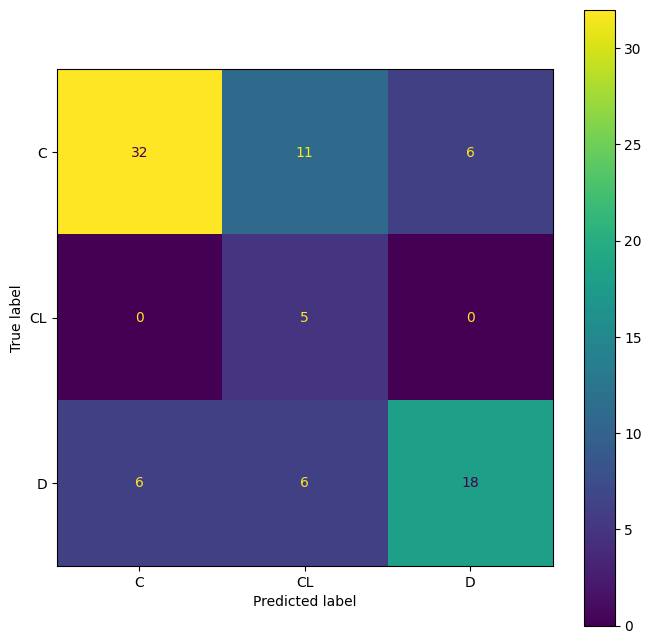

In [108]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(svm4, X_test ,y_test, ax=plt.subplot());

In [109]:
print(classification_report(svm2.predict(X_test), y_test, target_names=y_test.unique()))

              precision    recall  f1-score   support

           C       0.63      0.84      0.72        37
           D       0.20      0.08      0.12        12
          CL       0.73      0.63      0.68        35

    accuracy                           0.64        84
   macro avg       0.52      0.52      0.51        84
weighted avg       0.61      0.64      0.62        84

